<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-4.10_Part-3_Instacart-Report-Visualizations-for-Key-Questions-1-5" data-toc-modified-id="Exercise-4.10_Part-3_Instacart-Report-Visualizations-for-Key-Questions-1-5-1">Exercise 4.10_Part 3_Instacart Report Visualizations for Key Questions 1-5</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1">Import Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2">Import Data</a></span></li><li><span><a href="#Key-Questions" data-toc-modified-id="Key-Questions-1.3">Key Questions</a></span><ul class="toc-item"><li><span><a href="#Q1:-Busiest-day-of-the-week" data-toc-modified-id="Q1:-Busiest-day-of-the-week-1.3.1">Q1: Busiest day of the week</a></span></li><li><span><a href="#Q2:-Busiest-hour-of-the-day" data-toc-modified-id="Q2:-Busiest-hour-of-the-day-1.3.2">Q2: Busiest hour of the day</a></span><ul class="toc-item"><li><span><a href="#Q2_Part-1:-Average-prices-by-hour-of-day" data-toc-modified-id="Q2_Part-1:-Average-prices-by-hour-of-day-1.3.2.1">Q2_Part 1: Average prices by hour of day</a></span></li><li><span><a href="#Q2_Part-2:-Total-orders-by-hour-of-day" data-toc-modified-id="Q2_Part-2:-Total-orders-by-hour-of-day-1.3.2.2">Q2_Part 2: Total orders by hour of day</a></span></li></ul></li><li><span><a href="#Q3:-Price-range-groupings" data-toc-modified-id="Q3:-Price-range-groupings-1.3.3">Q3: Price range groupings</a></span></li><li><span><a href="#Q4:-Departments-by-number-of-orders" data-toc-modified-id="Q4:-Departments-by-number-of-orders-1.3.4">Q4: Departments by number of orders</a></span></li><li><span><a href="#Q5a:-Distribution-of-customers-by-frequency-of-orders" data-toc-modified-id="Q5a:-Distribution-of-customers-by-frequency-of-orders-1.3.5">Q5a: Distribution of customers by frequency of orders</a></span></li><li><span><a href="#Q5b:-Department-orders-by-customer-loyalty" data-toc-modified-id="Q5b:-Department-orders-by-customer-loyalty-1.3.6">Q5b: Department orders by customer loyalty</a></span></li><li><span><a href="#Q5c:-Customer-orders-by-region" data-toc-modified-id="Q5c:-Customer-orders-by-region-1.3.7">Q5c: Customer orders by region</a></span></li></ul></li></ul></li></ul></div>

# Exercise 4.10_Part 3_Instacart Report Visualizations for Key Questions 1-5

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [2]:
# make a path
path = r'/Users/profkdfischer/Instacart Basket Analysis'

In [3]:
# import the icac df after the merge with 'department' names 
icac3 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'icac_profiles.pkl'))

In [102]:
# import the 'unique_customers' df
unique_customers = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'unique_customers.pkl'))

In [103]:
unique_customers.head()

,order_id,user_id,order_number,orders_day_of_week,orders_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_mean,spending_flag,user_frequency,spend_status,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag,profile_income,profile_age,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low Spender,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,economical,young,economical young with kids
59,2968173,15,15,1,9,7.0,False,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest day,Most orders,22,Regular customer,3.980556,Low Spender,23.0,Non-frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,high activity customer,economical,senior,economical senior
131,2293453,19,2,5,14,6.0,False,196,3,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,9,New customer,8.372059,Low Spender,10.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,high activity customer,affluent,senior,affluent senior with kids
335,1573906,21,10,3,10,6.0,False,196,2,0,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,33,Regular customer,7.012683,Low Spender,8.0,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,West,high activity customer,affluent,senior,affluent senior
540,1593000,31,10,3,8,7.0,False,196,17,0,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,20,Regular customer,8.137793,Low Spender,6.0,Frequent customer,Female,Oklahoma,38,1/22/2019,1,married,52311,South,high activity customer,economical,young,economical young with kids


In [4]:
icac3.shape

(30964564, 33)

In [5]:
pd.set_option('display.max_columns', None)
icac3.head()

,order_id,user_id,order_number,orders_day_of_week,orders_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_mean,spending_flag,user_frequency,spend_status,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,department,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low Spender,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low Spender,13.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low Spender,10.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids


In [6]:
icac3.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_time', 'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_mean',
       'spending_flag', 'user_frequency', 'spend_status', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'Region',
       'department', 'customer_profile'],
      dtype='object')

## Key Questions

### Q1: Busiest day of the week

In [7]:
# create a bar chart of counts of orders for each day of the week
order_counts = icac3['orders_day_of_week'].value_counts().sort_index()

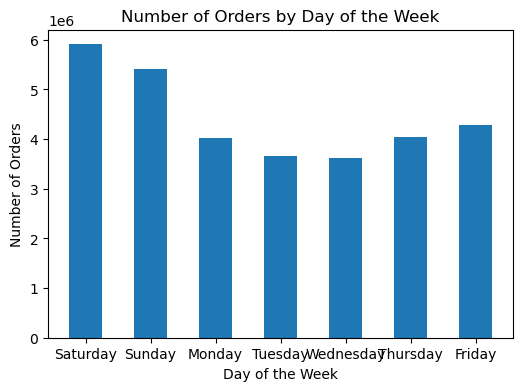

In [52]:
# plot it
day_names = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
plt.figure(figsize = (6, 4))
plt.bar(order_counts.index, order_counts.values, width = 0.5)
plt.xticks(ticks = order_counts.index, labels = day_names)
plt.title("Number of Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
file_path = os.path.join(path, '04 Analysis','Visualizations', 'Ex. 4.10_Key Qs', 'Q1_bar.png')
plt.savefig(file_path)
plt.show()

### Q2: Busiest hour of the day

#### Q2_Part 1: Average prices by hour of day

In [10]:
# aggregate the price data first
price_agg = icac3.groupby('orders_time')['prices'].mean().reset_index()

/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

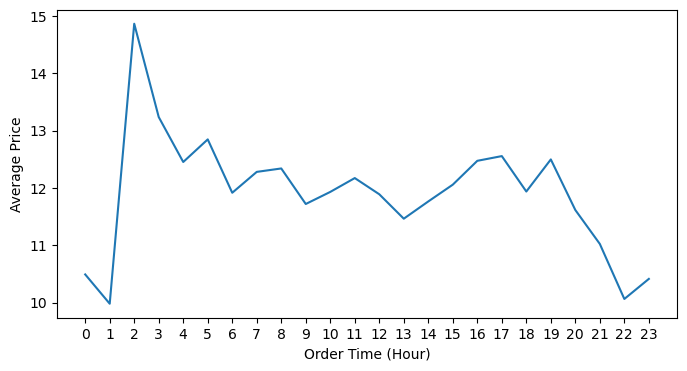

In [11]:
# create a line chart showing average price (calculated automatically in Seaborn on the y-axis) vs hour of day

plt.figure(figsize=(8, 4)) 
line1 = sns.lineplot(data = price_agg, x = 'orders_time', y = 'prices')
plt.xticks(range(0, 24))
plt.xlabel("Order Time (Hour)")
plt.ylabel("Average Price")
plt.show()

In [53]:
# save the line plot
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ex. 4.10_Key Qs', 'Q2_line.png'))

#### Q2_Part 2: Total orders by hour of day

In [13]:
# create a series 
order_counts2 = icac3['orders_time'].value_counts().sort_index()

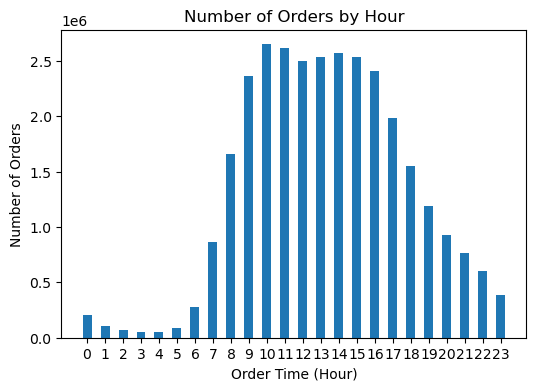

In [54]:
# plot it
plt.figure(figsize = (6, 4))
plt.bar(order_counts2.index, order_counts2.values, width = 0.5)
plt.xticks(ticks = order_counts2.index)
plt.title("Number of Orders by Hour")
plt.xlabel("Order Time (Hour)")
plt.ylabel("Number of Orders")
file_path = os.path.join(path, '04 Analysis','Visualizations', 'Ex. 4.10_Key Qs', 'Q2_bar.png')
plt.savefig(file_path)
plt.show()

### Q3: Price range groupings

In [15]:
# create a series 
custom_order = ['Low-range product', 'Mid-range product', 'High-range product']
order_counts3 = icac3['price_range_loc'].value_counts().reindex(custom_order)

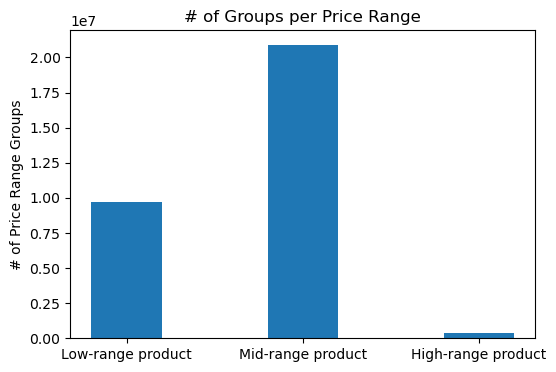

In [55]:
# plot it
plt.figure(figsize=(6, 4))
plt.bar(order_counts3.index, order_counts3.values, width=0.4)
plt.xticks(ticks=order_counts3.index)
plt.title("# of Groups per Price Range")
plt.ylabel("# of Price Range Groups")
file_path = os.path.join(path, '04 Analysis','Visualizations', 'Ex. 4.10_Key Qs', 'Q3_bar.png')
plt.savefig(file_path)
plt.show()

### Q4: Departments by number of orders

In [17]:
# make a series for all departments purchased by all customers
department_totals = icac3.groupby('department')['prices'].sum().sort_values(ascending=False)

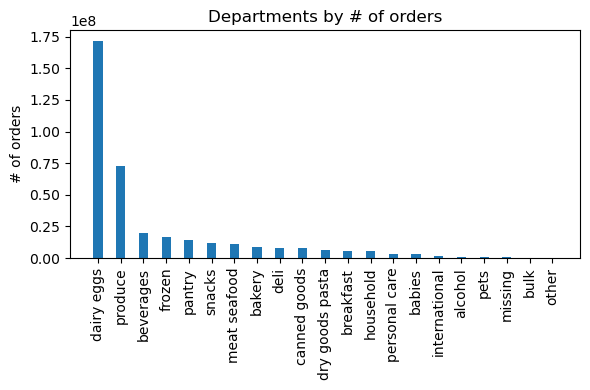

In [107]:
# plot it
plt.figure(figsize = (6, 4))
plt.bar(department_totals.index, department_totals.values, width = 0.4)
plt.xticks(ticks = department_totals.index, rotation = 90)
plt.title("Departments by # of orders")
plt.ylabel("# of orders")
plt.tight_layout()
file_path = os.path.join(path, '04 Analysis','Visualizations', 'Ex. 4.10_Key Qs', 'Q4_bar.png')
plt.savefig(file_path)
plt.show()

### Q5a: Distribution of customers by frequency of orders

Text(0.5, 0, '# days since prior order')

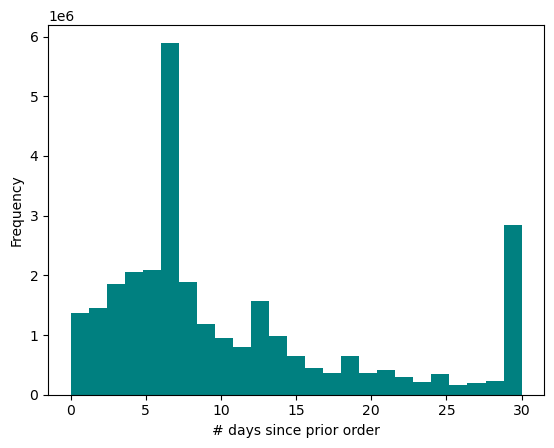

In [19]:
# create a histogram
hist1 = icac3['days_since_prior_order'].plot.hist(bins = 25, color = "teal")
hist1.set_xlabel("# days since prior order")

In [57]:
# save the histogram
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ex. 4.10_Key Qs', 'Q5a_hist.png'))

### Q5b: Department orders by customer loyalty

In [21]:
# crosstab of department by loyalty flag
crosstab = pd.crosstab(icac3['department'], icac3['loyalty_flag'], dropna = False)
sorted_index = crosstab.sum(axis=1).sort_values(ascending=False).index
sorted_crosstab = crosstab.reindex(sorted_index)

<Figure size 1000x600 with 0 Axes>

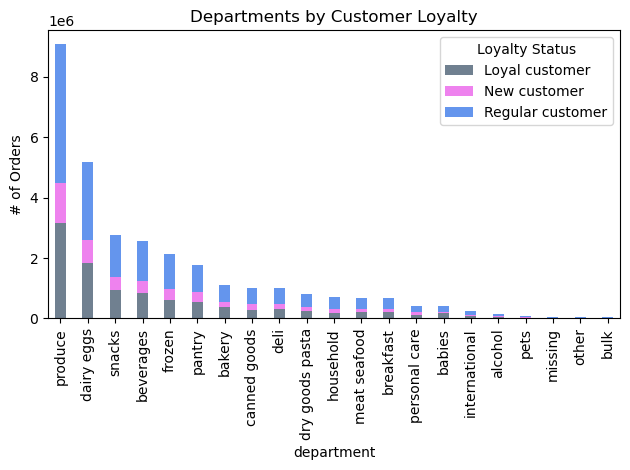

In [58]:
# plot it
colors = ['slategrey', 'violet', 'cornflowerblue']
plt.figure(figsize = (10, 6))
sorted_crosstab.plot.bar(stacked=True, width = 0.4, color = colors)
plt.xticks(rotation = 90)
plt.title("Departments by Customer Loyalty")
plt.ylabel("# of Orders")
plt.legend(title='Loyalty Status')
plt.tight_layout()
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5b_bar.png')
plt.savefig(file_path)
plt.show()

### Q5c: Customer orders by region

#### Q5c_Part 1_compare total departments ordered by region

In [23]:
# calculate the total of each department ordered by region
department_region = icac3.groupby(['Region', 'department']).size().unstack(fill_value=0)
department_region

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,498225,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,370436,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,709906,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,543164,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


<Figure size 1500x1000 with 0 Axes>

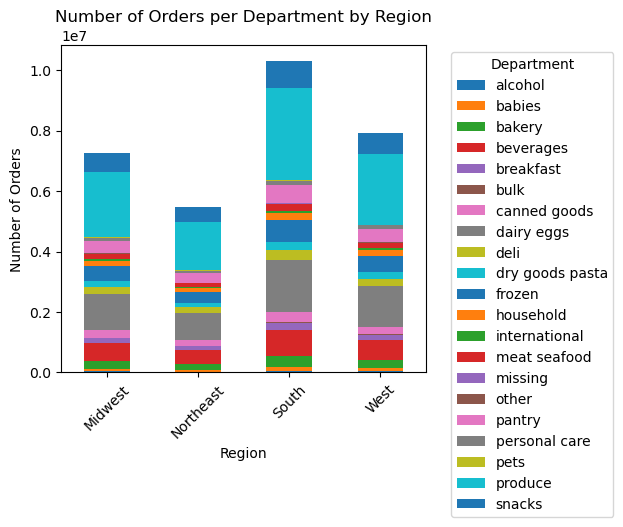

In [108]:
# plot it
plt.figure(figsize=(15, 10))
department_region.plot(kind='bar', stacked=True)
plt.title('Number of Orders per Department by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5c_bar.png')
plt.savefig(file_path)
plt.show()

Comment: no obvious differences in product preferences between regions.

#### Q5c_Part 2_compare total cost of orders ordered by region

In [25]:
# find the total price of each order and broadcast it to the new column "total_cost_of_order"
icac3['total_cost_of_order'] = icac3.groupby(['user_id', 'order_number'])['prices'].transform('sum')

In [26]:
icac3.head()

,order_id,user_id,order_number,orders_day_of_week,orders_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_mean,spending_flag,user_frequency,spend_status,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,department,customer_profile,total_cost_of_order
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low Spender,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids,31.6
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids,35.4
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low Spender,13.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids,28.2
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low Spender,10.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids,26.0
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,economical young with kids,57.0


In [27]:
icac3['total_cost_of_order'].describe()

count    3.096456e+07
mean     1.884729e+02
std      1.981418e+03
min      1.000000e+00
25%      6.700000e+01
50%      1.079000e+02
75%      1.623000e+02
max      1.004529e+05
Name: total_cost_of_order, dtype: float64

In [28]:
# find the average of the total_cost_of_order by region
region_order_totals = icac3.groupby('Region')['total_cost_of_order'].mean()

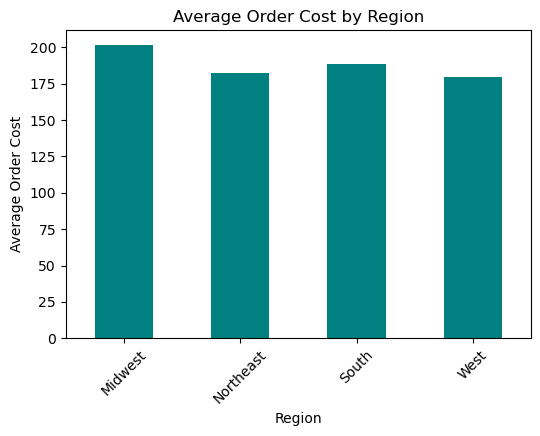

In [60]:
# plot it
plt.figure(figsize=(6, 4))
region_order_totals.plot.bar(color='teal', width = 0.5)
plt.title('Average Order Cost by Region')
plt.ylabel('Average Order Cost')
plt.xticks(rotation=45)
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5c_bar2.png')
plt.savefig(file_path)

plt.show()

Comment: no obvious differences in average total_order_cost by region.

### Q5d: Age vs Family Status

In [62]:
# sort the active customers by age (50 and over)
icac3.loc[(icac3['Age'] >= 50), 'profile_age'] = 'senior'

# sort the active customers by age (under 50)
icac3.loc[(icac3['Age'] < 50), 'profile_age'] = 'young'

# check the counts
icac3['profile_age'].value_counts(dropna = False)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_12274/3255560441.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'senior' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  icac3.loc[(icac3['Age'] >= 50), 'profile_age'] = 'senior'


profile_age
young     15548289
senior    15416275
Name: count, dtype: int64

In [64]:
crosstab = pd.crosstab(icac3['profile_age'], icac3['fam_status'])
crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
profile_age,,,,
senior,2645271,0,11550903,1220101
young,0,1481172,10192808,3874309


<Figure size 800x600 with 0 Axes>

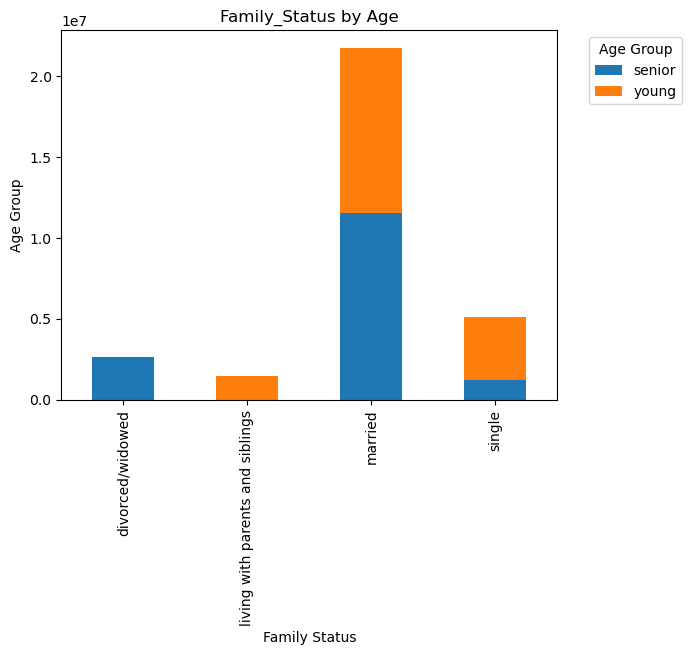

In [127]:
crosstab = pd.crosstab(icac3['fam_status'], icac3['profile_age'])
# plot it
plt.figure(figsize=(8, 6))
crosstab.plot.bar(stacked=True)
plt.title('Family_Status by Age')
plt.xlabel('Family Status')
plt.ylabel('Age Group')
plt.xticks(rotation = 90)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5d_bar.png')
plt.savefig(file_path)
plt.show()

Comment: Young customers are never divorced/widowed and senior customers are never living with parents/siblings.

In [65]:
crosstab = pd.crosstab(icac3['n_dependants'], icac3['fam_status'])
crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,2645271,0,0,5094410
1,0,508045,7211061,0
2,0,484658,7248603,0
3,0,488469,7284047,0


Comment: Divorced/widowed and single customers never have kids. "Living with parents and siblings" and "married" always have kids.

In [72]:
crosstab = pd.crosstab(icac3['profile_age'], icac3['spend_status'])
crosstab

spend_status,Frequent customer,Non-frequent customer
profile_age,,
senior,71098,28733
young,70096,28756


In [74]:
crosstab = pd.crosstab(icac3['profile_age'], icac3['loyalty_flag'])
crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
profile_age,,,
senior,5132342,2411260,7872673
young,5151751,2392435,8004103


Comment: Age plays no role in frequency of orders or total number of orders.

In [77]:
crosstab = pd.crosstab(icac3['fam_status'], icac3['spend_status'])
crosstab['Frequent_to_Non-frequent_Ratio'] = crosstab['Frequent customer'] / crosstab['Non-frequent customer']
crosstab

spend_status,Frequent customer,Non-frequent customer,Frequent_to_Non-frequent_Ratio
fam_status,,,
divorced/widowed,11957,4833,2.474033
living with parents and siblings,6814,2682,2.540641
married,99547,40705,2.445572
single,22876,9269,2.468012


<Figure size 800x600 with 0 Axes>

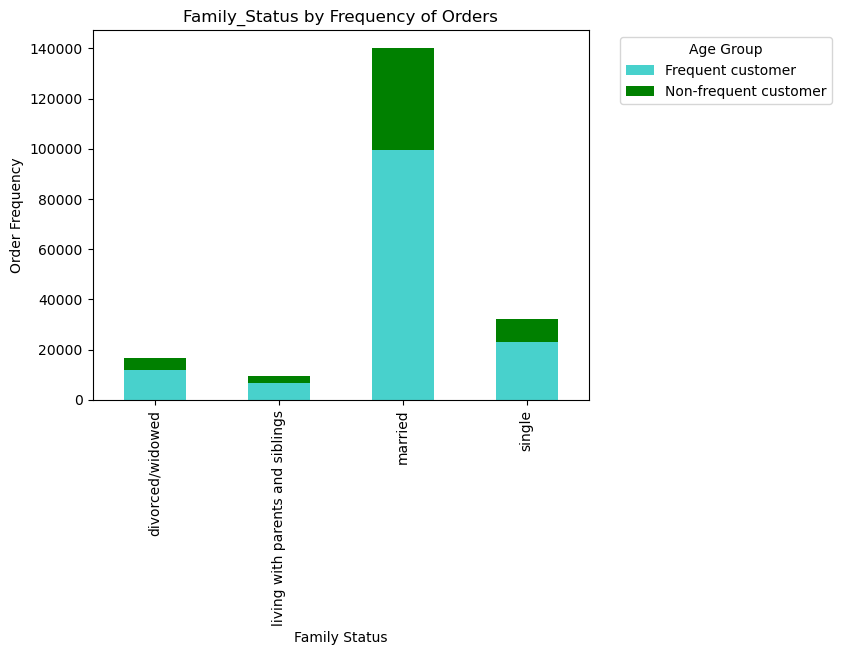

In [128]:
crosstab = pd.crosstab(icac3['fam_status'], icac3['spend_status'])
# plot it
colors = ['mediumturquoise', 'green']
plt.figure(figsize=(8, 6))
crosstab.plot.bar(stacked=True, color = colors)
plt.title('Family_Status by Frequency of Orders')
plt.xlabel('Family Status')
plt.ylabel('Order Frequency')
plt.xticks(rotation = 90)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5d_bar2.png')
plt.savefig(file_path)
plt.show()

Comment: There is no obvious difference between the sizes of the frequency groups in each column.
         Family status plays no apparent role in frequency of ordering (median days_since_prior_order).

<Figure size 1000x800 with 0 Axes>

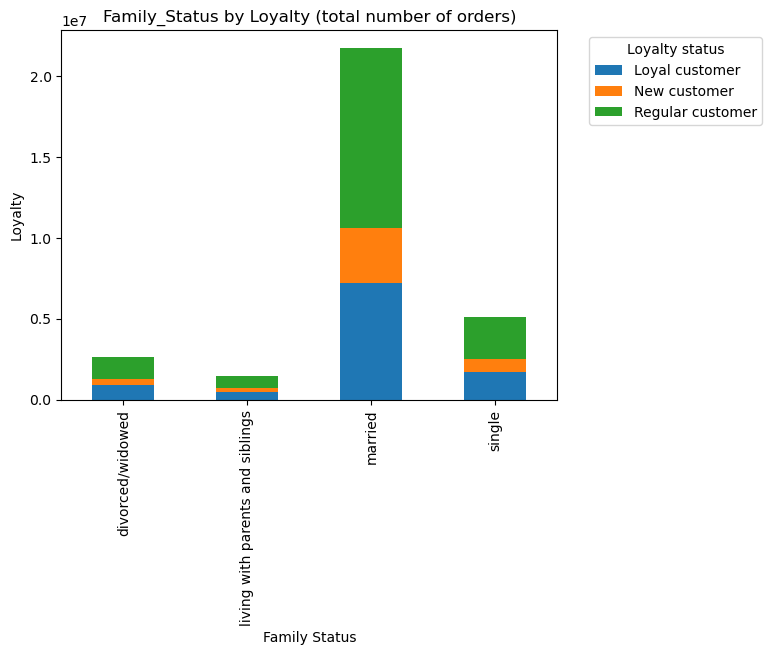

In [125]:
crosstab = pd.crosstab(icac3['fam_status'], icac3['loyalty_flag'])
# plot it
plt.figure(figsize=(10, 8))
crosstab.plot.bar(stacked=True)
plt.title('Family_Status by Loyalty (total number of orders)')
plt.xlabel('Family Status')
plt.ylabel('Loyalty')
plt.xticks(rotation = 90)
#plt.tight_layout()
plt.legend(title='Loyalty status', bbox_to_anchor=(1.05, 1), loc='upper left')
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5d_bar3.png')
plt.savefig(file_path)
plt.show()

In [ ]:
Comment: There is no obvious difference between the sizes of the loyalty groups in each column.
         Family status plays no apparent role in loyalty (total number of orders).

### Q5e: Classification of customers

The demographic information includes age, income, family_status, number of dependants, and region. Along with certain types of department categories, it is possible to group the customers as, for example, young singles, young families, older singles, older familes, and all of these in various income groups, and then in all 4 regions. If there were more instances of people purchasing from the "babies" category and number of dependants was 1, then "new parents" could be included. It is theoretically possible to divide the singles up into categories based on whether they purchase alcohol, beverages, and snacks, versus purchasing healthy foods and self-care products, however, the data on these items is limited.

### Q5f: Classification of customers

No differences in customer profiles were found 
Divorced/widowed and single customers never have kids. 
"Living with parents and siblings" and "married" always have kids.

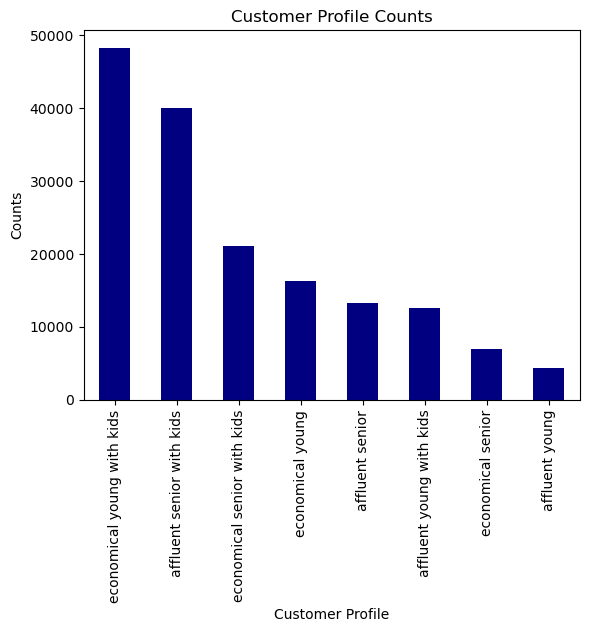

In [106]:
# make a set of the customer profiles for a chart
counts = unique_customers['customer_profile'].value_counts()

# make a bar chart
bar2 = counts.plot.bar(color='navy')
plt.title('Customer Profile Counts')
plt.xlabel('Customer Profile')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Ex. 4.10_Key Qs', 'Q5f_bar3.png'))